In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix


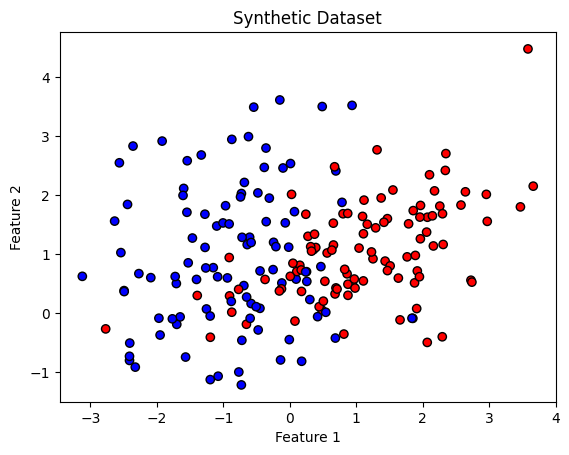

In [2]:
# Create a dataset with 2 features
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Synthetic Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [4]:
# Transform features to polynomial (degree=10)
poly = PolynomialFeatures(degree=10)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train logistic regression with minimal regularization (simulate no regularization)
model_overfit = LogisticRegression(penalty='l2', C=1e10, max_iter=10000)
model_overfit.fit(X_train_poly, y_train)

# Predictions
y_train_pred = model_overfit.predict(X_train_poly)
y_test_pred = model_overfit.predict(X_test_poly)

# Evaluate
print("Train Accuracy (Overfit Model):", accuracy_score(y_train, y_train_pred))
print("Test Accuracy (Overfit Model):", accuracy_score(y_test, y_test_pred))



Train Accuracy (Overfit Model): 1.0
Test Accuracy (Overfit Model): 0.7666666666666667


In [10]:
from sklearn.metrics import log_loss
y_train_prob = model_overfit.predict_proba(X_train_poly)
y_test_prob = model_overfit.predict_proba(X_test_poly)

train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)

print("Train Log Loss (Overfit Model):", train_log_loss)
print("Test Log Loss (Overfit Model):", test_log_loss)

Train Log Loss (Overfit Model): 0.00030857394746639216
Test Log Loss (Overfit Model): 8.022213773149934


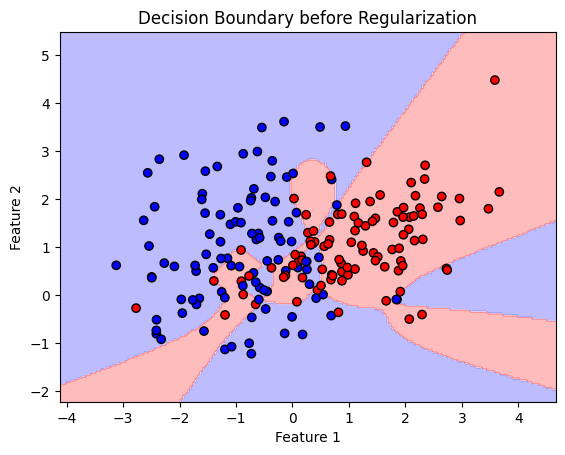

In [12]:
# Create a mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))

# Predict for each point in the grid
Z = model_overfit.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Decision Boundary before Regularization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [5]:
# Logistic Regression with L2 regularization
model_reg = LogisticRegression(penalty='l2', C=1.0, max_iter=10000)
model_reg.fit(X_train_poly, y_train)

# Predictions
y_train_pred_reg = model_reg.predict(X_train_poly)
y_test_pred_reg = model_reg.predict(X_test_poly)

# Evaluate
print("Train Accuracy (Regularized Model):", accuracy_score(y_train, y_train_pred_reg))
print("Test Accuracy (Regularized Model):", accuracy_score(y_test, y_test_pred_reg))


Train Accuracy (Regularized Model): 0.8714285714285714
Test Accuracy (Regularized Model): 0.8333333333333334


In [11]:
y_train_prob = model_reg.predict_proba(X_train_poly)
y_test_prob = model_reg.predict_proba(X_test_poly)

train_log_loss = log_loss(y_train, y_train_prob)
test_log_loss = log_loss(y_test, y_test_prob)

print("Train Log Loss (Regularized Model):", train_log_loss)
print("Test Log Loss (Regularized Model):", test_log_loss)


Train Log Loss (Regularized Model): 0.2117871866098232
Test Log Loss (Regularized Model): 0.8888735735334272


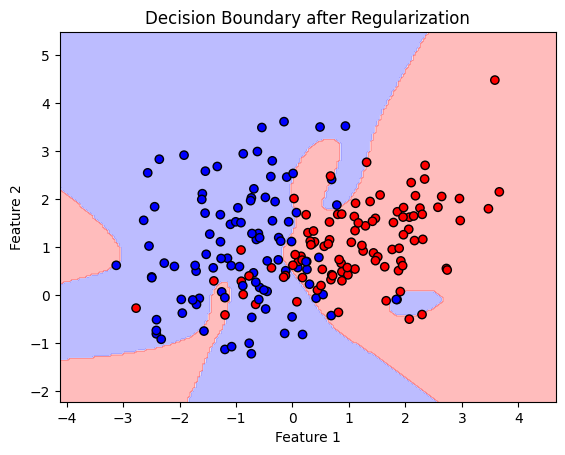

In [6]:
# Create a mesh grid for plotting
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))

# Predict for each point in the grid
Z = model_reg.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Decision Boundary after Regularization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
